## Basics of solving differential equations in Python

In CBI310 we won’t solve differential equations by hand. All integration will be performed numerically. The reason for this is that most differential equations will be of the multiple (or simultaneous) kind were hand solutions are very hard or even impossible. Work through this notebook to get the basic tools in place. Make sure you fully understand what is meant with a multiple differential equation.

Let’s start with a simple exercise. Take the polynomial: 

$$y=-0.15x^2+50x+50$$
  
Before we go, let’s import some Python functions.

In [1]:
import numpy as numpy
from __future__ import division
from numpy import linspace
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

Define a x array from 0 to 300 with increments of size 2 (11 increments)

In [2]:
x=linspace(0,300,32)

If you want to you can look at (or print) the array.

In [3]:
x

array([  0.        ,   9.67741935,  19.35483871,  29.03225806,
        38.70967742,  48.38709677,  58.06451613,  67.74193548,
        77.41935484,  87.09677419,  96.77419355, 106.4516129 ,
       116.12903226, 125.80645161, 135.48387097, 145.16129032,
       154.83870968, 164.51612903, 174.19354839, 183.87096774,
       193.5483871 , 203.22580645, 212.90322581, 222.58064516,
       232.25806452, 241.93548387, 251.61290323, 261.29032258,
       270.96774194, 280.64516129, 290.32258065, 300.        ])

We can now define the function:

In [4]:
y=-0.15*x**2+50*x+50

We can look at it:

In [5]:
y

array([  50.        ,  519.82310094,  961.55046826, 1375.18210198,
       1760.71800208, 2118.15816857, 2447.50260146, 2748.75130073,
       3021.90426639, 3266.96149844, 3483.92299688, 3672.78876171,
       3833.55879292, 3966.23309053, 4070.81165453, 4147.29448491,
       4195.68158169, 4215.97294485, 4208.1685744 , 4172.26847034,
       4108.27263267, 4016.18106139, 3895.9937565 , 3747.710718  ,
       3571.33194589, 3366.85744017, 3134.28720083, 2873.62122789,
       2584.85952133, 2268.00208117, 1923.04890739, 1550.        ])

Or even better, we can plot it:

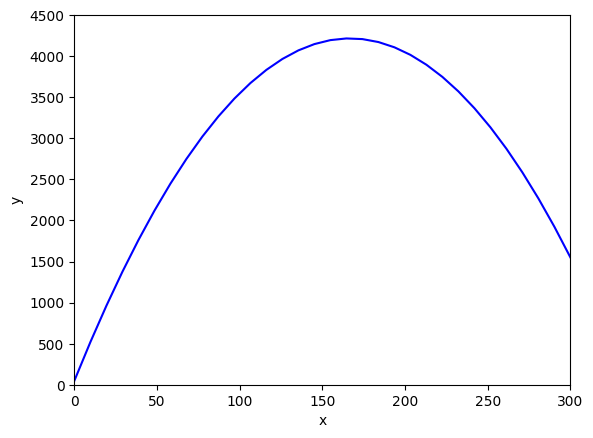

In [6]:
plt.plot(x, y,color='blue')
plt.ylabel('y')
plt.xlabel('x')
plt.axis([0,300,0,4500])
plt.show()

The plot looks a bit edgy if you have a close look. Let's define more intervals for the x array (we'll call it x1) and replot:

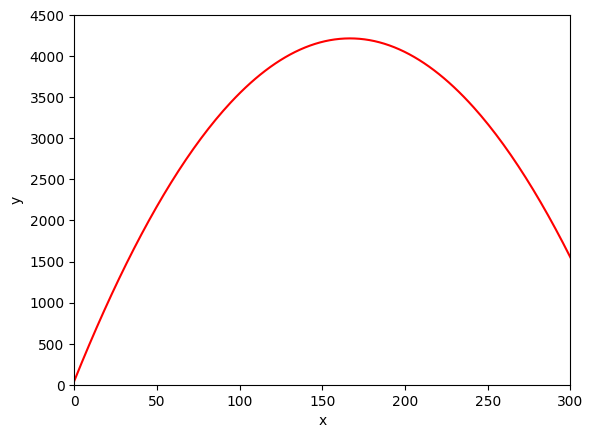

In [7]:
x1=linspace(0,300,201)  #201 increments
y1=-0.15*x1**2+50*x1+50  #y1 corresponds to x1

plt.plot(x1, y1,color='red')
plt.ylabel('y') 
plt.xlabel('x') 
plt.axis([0,300,0,4500]) 
plt.show()

That looks better and smoother. Note that the array elements can also be plotted as markers:

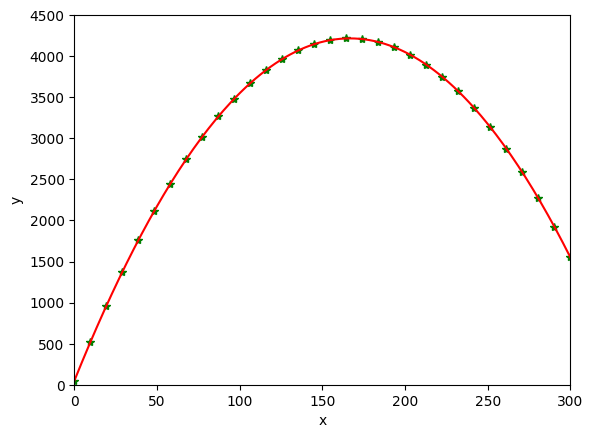

In [8]:
plt.plot(x, y,'*',color='green') #plot the short arrays (x1 and y1) as stars
plt.plot(x1, y1,color='red')
plt.ylabel('y') 
plt.xlabel('x') 
plt.axis([0,300,0,4500]) 
plt.show()

Let's also plot the following similar function as y2 (and x2):

$$y=-0.15x^2+50x-700$$



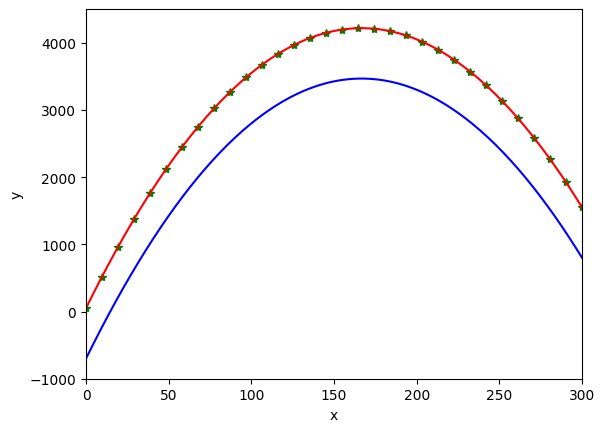

In [9]:
x2=linspace(0,300,201)  
y2=-0.15*x1**2+50*x1-700

plt.plot(x, y,'*',color='green')
plt.plot(x1, y1,color='red')
plt.plot(x2, y2,color='blue')
plt.ylabel('y') 
plt.xlabel('x') 
plt.axis([0,300,-1000,4500]) 
plt.show()


Can you see that the functions look the same except for the relative y (or height) position?

### Moving onto differential equations

Let’s take the derivative of the polynomial above:

$$\frac{dy}{dx}=-0.3x+50$$

We want to solve this equation using numerical integration. The equation is referred to as a differential equation (DE) because there is a differential term in the equation. We always start by defining the DE as a function. 


In [10]:
def intfun(x, y):  #for solve_ivp you need to define you independent variable(x), then your dependent variable(y)
    return [-.3*x+50]

The function 'intfun' is now defined. When calling this function for a specific x (and y) value it will return a value: 

In [11]:
intfun(100, 1)

[20.0]

The function above is not dependant on y, so any y value will result in the answer above as long as x remains the same:

In [12]:
intfun(100, 3000)

[20.0]

The function that solves (or integrate) the DE (solve_ivp) requires that the DE is defined in terms of the independant variable (x) and/or the dependant variable (y)

It is straighforward to use **solve_ivp**:

* you just call the function that contains the DE (intfun)
* define an intital value (the y value where x=0)
* specify the x-values that you want to calculate (via solve_ivp) y-values for

In [26]:
from scipy.integrate import solve_ivp   # import the solve_ivp function

yo=[100]  #initial value
xmax=300   #max x value
xper=(0,xmax) # x begin and end value
xspan=numpy.linspace(0,xmax,1000) #x values that we want y values reported for 

ans = solve_ivp(intfun, xper, yo, dense_output = True, method = "LSODA")  # function, initial value (x=1000 @ y=0), use dense_output = True

y4 = ans.sol(xspan)[0]

The answer (y4) has been generated! We can now plot it against y1(x1):

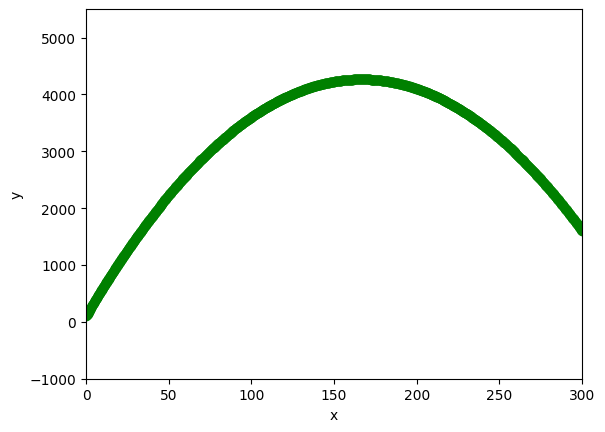

In [27]:
#plt.plot(x1, y1,color='red')
plt.plot(xspan, y4,'o',color='green')
plt.ylabel('y') 
plt.xlabel('x') 
plt.axis([0,300,-1000,5500]) 
plt.show()

Looks very similar, except for the height. Play around with the initial value of y (init_y) and replot. Can you see what is happening?

We won't be going into the theory of numerically solving DE's but you need a basic understanding of what odeint does. The DE function can be interpreted in a 2D space as something that define vectors for any x,y coordinate. The function odeint merely 'walks' from a known point to an estimated new point by considering the vector directions in the vicinity of the old and new point (remember Euler and Runga-Kutta). The step size to generate a new estimated point is typically small. The step size has **no relationship** to the increment size between reported x values (x4 array). The function odeint will determine and vary the step size internally.

<img src="desolve.png" width="750" />
 


### Multiple differential equations

Most of the DE’s in CBI310 are of the multiple kind. Take the following DE set as an example:

$$\frac{dy_1}{dx}=y_2$$

$$\frac{dy_2}{dx}=-0.2y_2-y_1$$

$$y_1(0)=10\;\;y_2(0)=0$$

It is not that easy solving the above by hand for the given initial conditions. Note that this is a three dimensional problem, and given a pre-defined starting coordinate in the $y_1$, $y_2$, $x$-space, the solution will entail a 3D curve in a 3D space.We talk about x as the independant varaible since we'll specify the x values where we want to solve for the corresponding $y_1$ and $y_2$ values.

**It is impossible to solve these two differential equations (DE’s) separately!** 

The multiple DE’s can be defined as a single ‘array’ function that contains two elements:



In [28]:
def intfun2(x, y):
    return [y[1],                  # DE 1
            -0.2*y[1]-y[0]]        # DE 2


We can call this function (intfun2) in a similar manner as before, by evaluating the function at a specific $y_1$, $y_2$, $x$ coordinate. Note that two y-values need to be specified.

In [29]:
intfun2(2, [1, 1])

[1, -1.2]

The function returns two values ($\frac{dy_1}{dx}$ and $\frac{dy_2}{dx}$ at the specific coordinate). These can be seen as the tangents, slopes or differential equations of the function y that we will be solving for. Never forget that $y$ has two parts in this example.

Note that this specific function is not dependant on the independant variable x.


In [30]:
intfun2(30, [1, 1])

[1, -1.2]

Solving the set of multiple DE's is very easy:

In [32]:
yo2=[10,0]  #initial value
xmax2=60
xper2=[0,xmax2]
xspan2=numpy.linspace(0,xmax2,300) 

ans2 = solve_ivp(intfun2,xper2,yo2, dense_output = True,method = "LSODA")
#Note that a doube DE always require two initial conditions [10,0]

y1,y2 = ans2.sol(xspan2) #NB 

The answer (ans) contains numerous information. The last line of code above extract the values of y1 and y2 at the given xspan2 values. Let's plot:


We can also plot the answer:

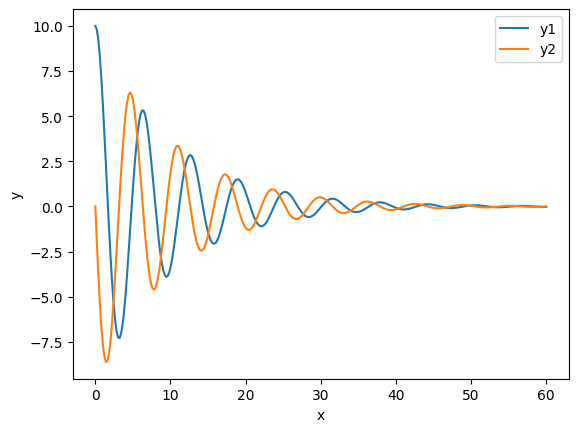

In [33]:
plt.plot(xspan2,y1)
plt.plot(xspan2,y2)
plt.ylabel('y') 
plt.xlabel('x') 
plt.legend(['y1', 'y2'])
plt.show()

There is clearly 2 plots as expected ($y_1$ vs. $x$ and $y_2$ vs. $x$). Let's assign different colours to the two plots.

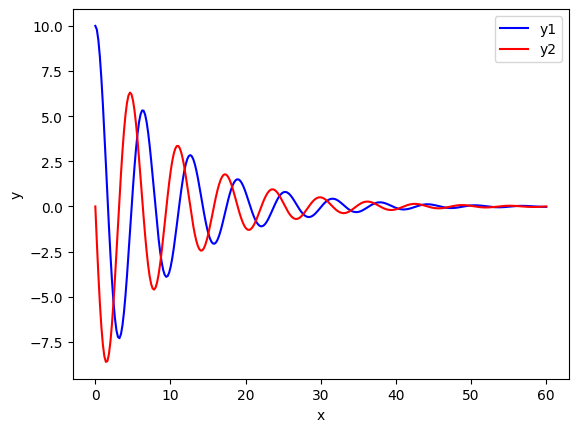

In [34]:
plt.plot(xspan2, y1, color='blue', label = 'y1')
plt.plot(xspan2, y2, color='red', label = 'y2')
plt.ylabel('y') 
plt.xlabel('x') 
plt.legend()
plt.show()

You are now ready to integrate bioreactor mole balances!
----------


<img src="intfun.jpg" width="350" />


[Back to Contents page](https://nbviewer.jupyter.org/github/willienicol/Biochemical-engineering-notes/blob/master/List%20of%20contents.ipynb)